# Collaborative Filtering using Cosine Similarity and Pearson Correlation: MovieLens Example

---

## Notebook Structure

1. Metadata
2. Title and Objective
3. Dataset Overview and Merging
4. Exploratory Data Analysis (EDA)
5. Concept Explanation
   - What is Collaborative Filtering?
   - Why and Where do we use it?
   - Types of Collaborative Filtering
6. Mathematical Intuition
   - Cosine Similarity (formula in plain symbols)
   - Pearson Correlation (formula in plain symbols)
7. Implementation and Example
   - Data Preparation and Pivot Table Creation
   - Similarity Calculation (Cosine & Pearson)
   - Generating Movie Recommendations
8. Conclusion and Learnings
9. Acknowledgements


## 1. Metadata

- **Dataset**: MovieLens dataset (ratings.csv and movies.csv)
- **Task**: Generate movie recommendations using Collaborative Filtering
- **Tech Stack**: Python, Pandas, NumPy, Matplotlib, Seaborn
- **Techniques**: Cosine Similarity & Pearson Correlation


## 2. Title and Objective

### **Title**
Collaborative Filtering using Cosine Similarity and Pearson Correlation on MovieLens Data

### **Objective**
- **What?** To build a recommendation system using collaborative filtering.
- **Why?** To leverage user ratings and movie similarities to suggest movies that a user might like.
- **How?** By computing similarity metrics (cosine similarity and Pearson correlation) between users and aggregating ratings.
- **Where?** In domains like movie, music, or product recommendations.


## 3. Dataset Overview and Merging

For this example, we use the MovieLens dataset which is divided into two files:
- **ratings.csv**: Contains user ratings with columns such as `userId`, `movieId`, `rating`, and `timestamp`.
- **movies.csv**: Contains movie details with columns such as `movieId`, `title`, and `genres`.

We will merge these datasets on the common column `movieId` to analyze and generate recommendations.


In [2]:
import pandas as pd
from scipy import sparse
ratings = pd.read_csv('/content/ratings.csv')
movies = pd.read_csv('/content/movies.csv')
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head()

(100836, 4)


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


<ipython-input-14-3a3a45c695a5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x='rating', palette='viridis')


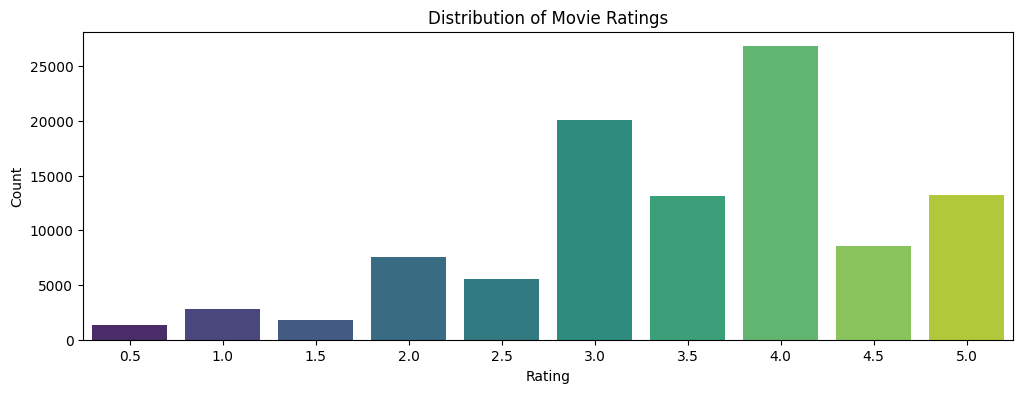

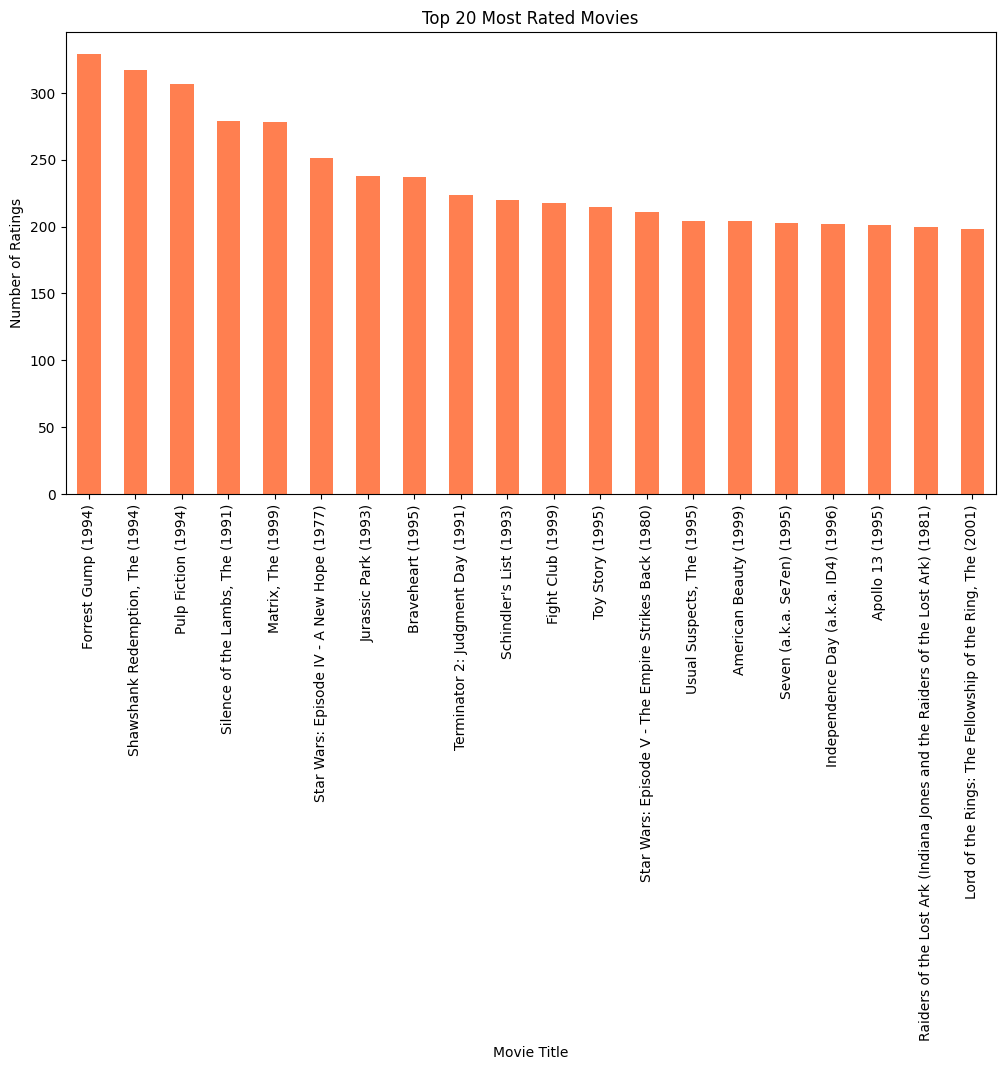

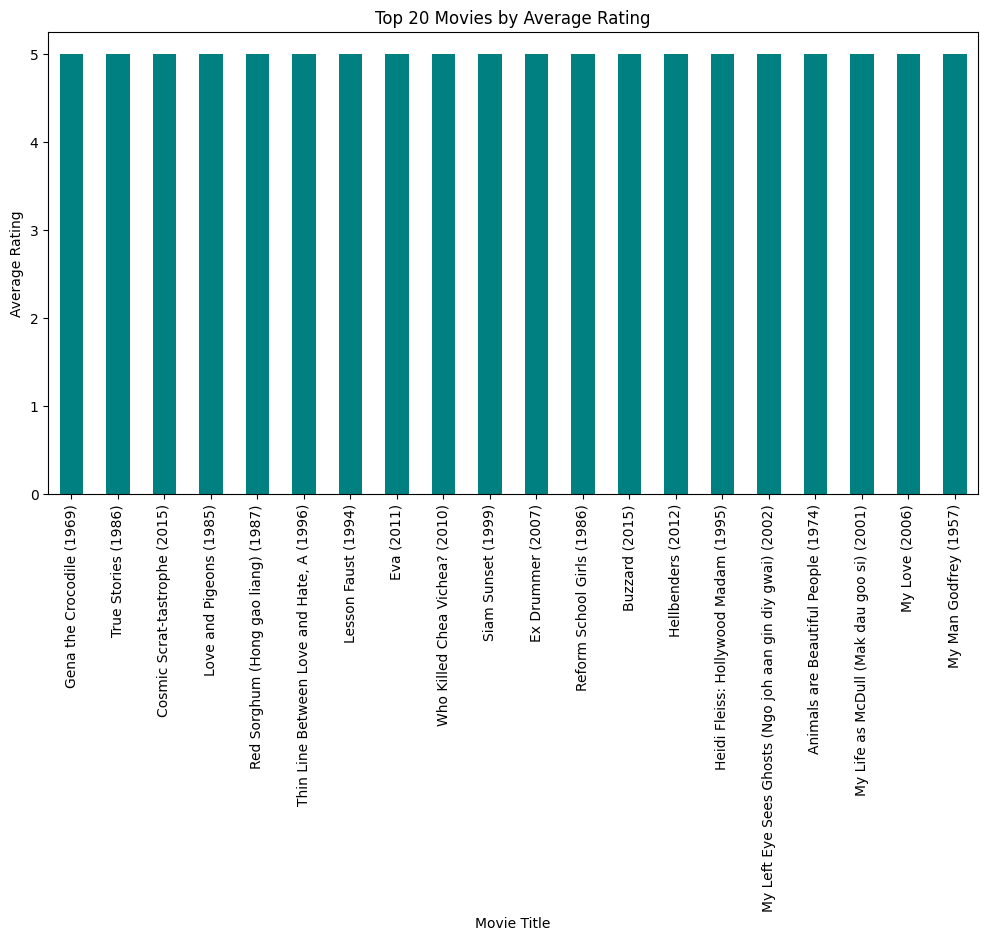

In [14]:
# 4. EDA: Analyze the merged dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(12, 4))
sns.countplot(data=ratings, x='rating', palette='viridis')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Number of ratings per movie (popularity)
movie_rating_counts = ratings.groupby('title')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
movie_rating_counts.head(20).plot(kind='bar', color='coral')
plt.title("Top 20 Most Rated Movies")
plt.xlabel("Movie Title")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()

# Average rating per movie
avg_ratings = ratings.groupby('title')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_ratings.head(20).plot(kind='bar', color='teal')
plt.title("Top 20 Movies by Average Rating")
plt.xlabel("Movie Title")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()


## 5. Concept Explanation

### What is Collaborative Filtering?
Collaborative Filtering (CF) is a recommendation technique that makes predictions about a user's interests by collecting preferences from many users. It assumes that if users have similar tastes, they will rate items similarly in the future.

### Why and Where do we use Collaborative Filtering?
- **Why?**
  - Leverages the collective behavior of users.
  - Does not require detailed item information (features) since only the ratings matter.
- **Where?**
  - Used in movie, music, e-commerce, and content recommendation systems.

### Types of Collaborative Filtering:
1. **User-based Collaborative Filtering:**
   - Identifies similar users based on their rating patterns.
   - Recommends items that similar users liked.
2. **Item-based Collaborative Filtering:**
   - Identifies similar items based on ratings from users.
   - Recommends items similar to those a user has liked.
   
In this notebook, we demonstrate user-based filtering using similarity metrics.


## 6. Mathematical Intuition

### Cosine Similarity

Cosine similarity measures the cosine of the angle between two rating vectors. It is given by:



cosine_similarity = (A • B) / (||A|| * ||B||)


- **A • B**: Dot product of rating vectors A and B.
- **||A||, ||B||**: Euclidean norms (magnitudes) of vectors A and B.

### Pearson Correlation

Pearson correlation measures the linear relationship between two rating vectors. It is calculated as:




pearson_correlation = covariance(A, B) / (std(A) * std(B))


- **covariance(A, B)**: How ratings in A and B vary together.
- **std(A), std(B)**: Standard deviations of A and B.

*Note:* For both metrics, only the items rated by both users (common ratings) are used.


In [3]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings.head()
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
#userRatings.fillna(0, inplace=True)
print("After: ",userRatings.shape)

Before:  (610, 9719)
After:  (610, 2269)


In [4]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Almost Famous (2000),0.099554,0.209549,0.032088,0.296727,0.134434,0.118628,0.242958,0.079158,0.005092,0.051279,...,0.244619,0.085395,0.072505,0.221259,0.126008,0.362571,0.011577,0.208008,0.186599,0.147413
Along Came Polly (2004),0.027287,0.282426,0.113213,0.193085,0.162678,0.180259,0.112928,0.121704,0.125792,0.124032,...,0.173133,0.160430,0.029076,0.189165,0.166278,0.309183,0.078468,-0.036498,0.231566,0.025928
Along Came a Spider (2001),0.064762,-0.003205,0.016372,0.085365,-0.018241,0.080388,0.094016,-0.016678,0.079375,-0.028052,...,0.115347,0.093774,0.085286,0.150757,0.052144,0.174489,0.014189,0.025327,0.233244,0.043581


In [5]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [10]:
import pandas as pd

romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    # Use pd.concat to concatenate the DataFrames
    similar_movies = pd.concat([similar_movies, get_similar(movie,rating).to_frame().T], ignore_index=True)
    # Convert get_similar output to DataFrame with .to_frame().T for proper concatenation

similar_movies.head(10)

title,(500) Days of Summer (2009),Silver Linings Playbook (2012),Adventureland (2009),Up in the Air (2009),50/50 (2011),"Descendants, The (2011)","Crazy, Stupid, Love. (2011)",About Time (2013),Toy Story 3 (2010),"Secret Life of Walter Mitty, The (2013)",...,"Remains of the Day, The (1993)",Leaving Las Vegas (1995),"Grifters, The (1990)","English Patient, The (1996)",Dances with Wolves (1990),Stargate (1994),"Madness of King George, The (1994)",Disclosure (1994),"Postman, The (Postino, Il) (1994)",Clear and Present Danger (1994)
0,2.500000,1.254898,1.157021,1.129961,1.123890,1.082774,1.076731,1.050643,1.050386,1.043048,...,-0.127058,-0.131261,-0.134995,-0.135628,-0.142231,-0.142870,-0.144495,-0.160575,-0.161373,-0.209810
1,0.203998,0.191226,0.130105,0.221842,0.139619,0.058567,0.186331,0.148771,0.147115,0.179240,...,-0.004244,-0.022697,0.000935,-0.028072,0.013454,-0.010708,-0.022814,-0.030627,-0.025479,-0.036196
2,-0.062634,-0.131106,-0.091790,-0.205500,-0.112038,-0.187131,-0.131742,-0.057615,-0.170463,-0.160831,...,-0.066664,-0.093771,-0.308606,-0.328057,-0.170352,-0.329190,-0.110041,0.122334,-0.113838,-0.124716
3,-0.056808,-0.060217,-0.083101,-0.093265,-0.064954,-0.059233,-0.042563,-0.039608,-0.063763,-0.063478,...,-0.022207,-0.035515,-0.144882,-0.141102,-0.047911,-0.078467,-0.020044,0.022402,-0.061293,-0.023133


In [11]:
similar_movies.sum().sort_values(ascending=False).head(20)

,0
title,
(500) Days of Summer (2009),2.584556
Alice in Wonderland (2010),1.395229
Silver Linings Playbook (2012),1.254800
Yes Man (2008),1.116264
Adventureland (2009),1.112235
Marley & Me (2008),1.108381
About Time (2013),1.102192
"Crazy, Stupid, Love. (2011)",1.088757
50/50 (2011),1.086517


## 8. Conclusion and Learnings

### Learnings:
- **Collaborative Filtering** leverages similar user behavior to predict preferences.
- **Cosine Similarity** measures the cosine of the angle between users’ rating vectors, capturing directional similarity.
- **Pearson Correlation** captures linear relationships and adjusts for individual biases.
- The choice of similarity measure affects the recommendation outcome.
- Using a real-world dataset like MovieLens provides insights into handling sparse data and merging multiple sources.

### Conclusion:
This notebook demonstrated a complete workflow for building a recommendation system using user-based collaborative filtering. We merged MovieLens ratings and movies data, performed EDA, computed similarity matrices using cosine similarity and Pearson correlation, and generated movie recommendations for a target user. Collaborative filtering remains a cornerstone of recommendation systems in many industries.

---

## 9. Acknowledgements

- **MovieLens Dataset**: Provided by GroupLens Research (https://grouplens.org/datasets/movielens/).
- Thanks to the open-source community for Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn which made this analysis possible.
